## NCal_Final_Model

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [2]:
 # Algorithms
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression

In [3]:
# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Searching
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [4]:
# Visualization
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [5]:
data = pd.read_csv("New_Dataset_Gender_Height_Weight_Age_Calories.csv")

In [6]:
x = data.iloc[:,:4]
y = data.iloc[:,4]

In [7]:
# Feature scalling
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [8]:
# Classifier score dict 
scores_dict = {}

#############################################################################################################################

### Final Models

In [9]:
# svr
b_svr=SVR()
b_svr_s = cross_val_score(b_svr,x,y, cv=5);
b_svr_results=np.average(b_svr_s) ;
print(b_svr_s)
print(b_svr_results)

[0.29125931 0.03191764 0.26457462 0.43008764 0.56471804]
0.3165114488589619


In [10]:
scores_dict['SVR'] =b_svr_results
b_svr_results

0.3165114488589619

In [11]:
# Tunned svr
t_svr=SVR(C=19,kernel='rbf')
t_svr_s = cross_val_score(t_svr,x,y, cv=5);
t_svr_results=np.average(t_svr_s) ;
print(t_svr_s)
print(t_svr_results)

[0.35225276 0.77723283 0.80405794 0.76764257 0.96842727]
0.7339226722848695


In [12]:
scores_dict['SVR_Optimized'] =t_svr_results
t_svr_results

0.7339226722848695

In [13]:
# AdaBoost  svr
svr=SVR(C=19,kernel='rbf')
svr_adb=AdaBoostRegressor(svr,loss='linear',learning_rate=0.1, n_estimators=100)
svr_s = cross_val_score(svr_adb,x,y, cv=5);
svr_results=np.average(svr_s) ;
print(svr_s)
print(svr_results)

[0.50495632 0.79087402 0.81537725 0.79705263 0.91410485]
0.7644730137926223


In [14]:
scores_dict['SVR_Adb'] =svr_results
svr_results

0.7644730137926223

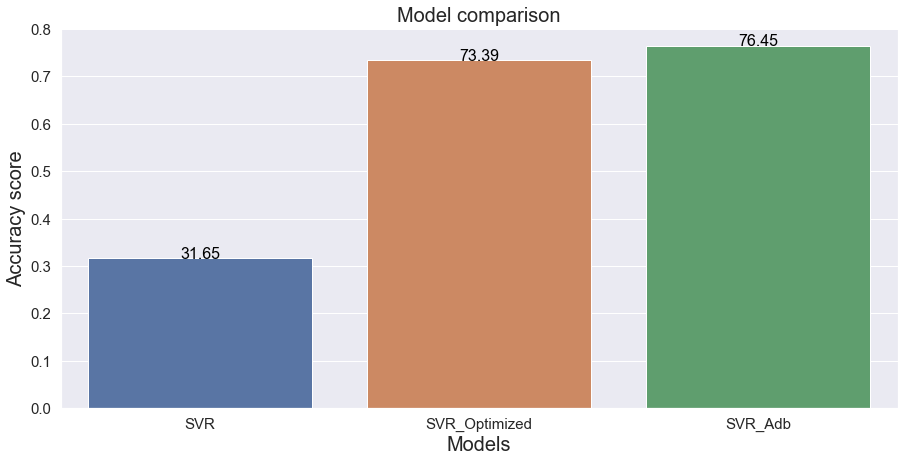

In [15]:
import seaborn as sns

with sns.color_palette('muted'):
  algo_name = list(scores_dict.keys())
  scores = list(scores_dict.values())
  #sns.color_palette("Greens_d", len(dataset))
  # deep , light winter spring
  sns.set(rc={'figure.figsize':(15,7)})
  plt.xlabel("Models",fontsize=20)
  plt.ylabel("Accuracy score",fontsize=20)
  plt.title("Model comparison",fontsize=20)
  plt.tick_params(labelsize=15) 
  s=sns.barplot(x=algo_name,y=scores)
  for idx, val in enumerate(scores):
    s.text(idx,val, round(scores[idx]*100,2), color='black', ha="center",fontsize=16)
    
  plt.show()  

##############################################################################################################################

In [16]:
svr=SVR(C=19,kernel='rbf')
svr_adb=AdaBoostRegressor(svr,loss='linear',learning_rate=0.1, n_estimators=100)
svr_adb.fit(x,y)
svr_adb.score(x,y)

0.8801814041966197

In [17]:
import math
import pickle

In [18]:
# save the model to disk
#fileName='NCalModel.pkl'
#pickle.dump(Mod,open(fileName,'wb'))

In [ ]:
# load the model from disk
#fileName='NCalModel.pkl'
#loaded_model=pickle.load(open(fileName,'rb'))